# Isomap
## 1. Exercise 1
- Write you own implementation of isomap.
- apply it to the swiss roll dataset from lab 1
- use a modified version of the swiss roll dataset, in which Gaussian noise from a normal $\mathcal{n}(\mu=0,\sigma=0.5)$ is added to the $x$  and $y$ coordinates.  
Apply isomap to this dataset and discuss the differences with the preivous point.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unsupervised_learning import swiss_roll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from unsupervised_learning.Isomap import Isomap

In [2]:
data = swiss_roll(1000)
clr = data[:, 0]**2+(data[:, 1]+2.5)**2

isomap = Isomap(n_neighbors=10)
x = isomap.fit_transform(data, alg='dijkstra')
plt.scatter(x[:,0],x[:,1], c=clr)

TypeError: 'module' object is not callable

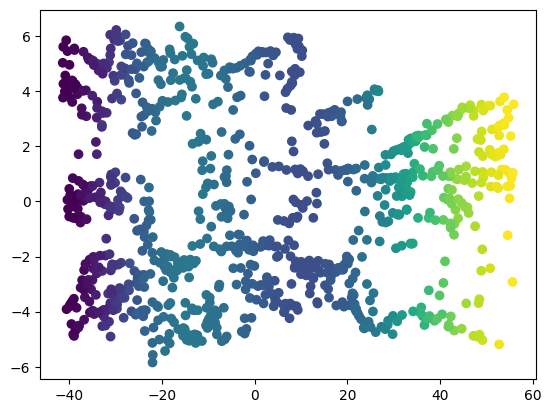

In [8]:
noise = np.random.normal(0, 0.5, (1000, 3))
noisy_data = noise + data
iso_me = isomap(noisy_data, n_neigbors=n_neighbors)
plt.scatter(iso_me[:,0],iso_me[:,1], c=clr)


## 2. Exercise 2
Undersample randomly from the Dry Bean Dataset in order to have n = 1000
datapoints. Follow the same pipeline of Exercise 1 of the previous lab by replacing PCA with Isomap. Discuss the differences with particular focus on the accuracy of the logistic regression.
**Important note**: in this case, you don't need to do the train-test split. Apply ISOMAP to the whole dataset first, and then do the train-test split and follow the rest of the pipeline.

In [56]:
beans = pd.read_excel(
    '/Users/alessandroquerenghi/Documents/Uni/362SM - unsupervised_learning/datasets/Dry_Bean_Dataset.xlsx')


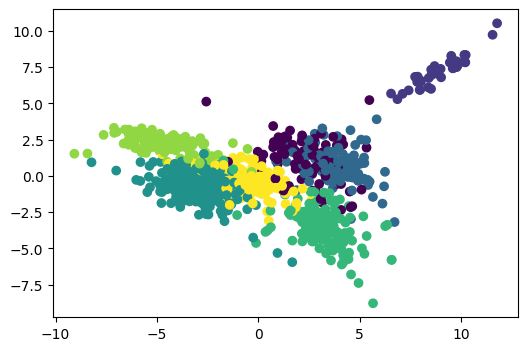

In [61]:
samples = beans.sample(1000)
y = samples['Class']
y = np.array(y)
encoder = OrdinalEncoder()
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1,1))
x = samples.drop('Class', axis=1)
x = (x-np.mean(x,axis=0))/np.std(x,axis=0)
isomap = Isomap(n_neighbors=30)
x_iso = isomap.fit_transform(x)

plt.figure(figsize=(6,4))
plt.scatter(x_iso[:,0],x_iso[:,1],c=y)

## Notes
- You can use the `sklearn.neighbors. NearestNeighbors` class.
- You are expected to write your own implementation of the **Floyd-Warshall algorithm**, as seen in class.
    - If you wish, you can implement Dijkstra's algorithm instead.
- Remember that your distance matrix must be **symmetric**!
- Suggestion: test you algorithm with n = 100 points at first.